## Business task: 
#### Cyclistic bike sharing company wants to analyze user data to find and understand how casual riders and annual members use Cyclistic bikes differently. From these insights, design a new marketing strategy to convert casual riders into annual members.

## Phase 1 : ASK (Asking the right questions)
### Key Objectives :
**1.Identify the business task:**

* To understand how casual riders and annual members use Cyclistic bikes differently and to maximize the number of annual memberships. 

**2.Consider key stakeholders:**

* The main stakeholders here are the director of marketing and my manager Lily Moreno, the rest of the marketing analytics team, and the Cyclistic executive team. 

**3.Business task:**

* Understanding how casual riders use cyclistic bikes different to annual members in order to make focused marketing strategies to attract casual riders to change to annual membership.

### Main question 
<h4> What could motivate the “casual” users to change to an annual subscription based on their behavior?

## Phase 2. PREPARE (Collecting and organizing accurate and credible data) 

### Key objectives :

**1. Checking credibility:**
* The data is public data from a bike sharing company. The data starts from the month of april 2020 to september 2021. Data is partially organized with irregular naming conventions. Nevertheless the data seems to be in good condition and its first hand data collected by the company itself with lots of entries and useful data.

**2. Sorting and organizing data:** 
* Making the datasets consistent and binding all datasets together in a single dataset with proper naming convention for easier analysis. For this analysis, the focus is on the 2020-2021 period as it's the more relevant period to the business task and it has the more complete data with geo-location coordinates, and types of bike used.

In [1]:
#including all libraries necessery for analysis

library("tidyverse")
library("ggplot2")
library("lubridate")
library("tidygeocoder")
library("geosphere")
library("gridExtra") 
library("ggmap") 
library("knitr")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.

Please cite ggmap if you use it! See citation("ggmap") for details.


Attaching package: ‘ggmap’


The following object is masked from ‘package:tidygeocoder’:

    geocode




In [2]:
#loading all datasets in there respective variable


tripdata_2020_04 <- read.csv("../input/cyclistic-bike-share/202004-divvy-tripdata.csv")
tripdata_2020_05 <- read.csv("../input/cyclistic-bike-share/202005-divvy-tripdata.csv")
tripdata_2020_06 <- read.csv("../input/cyclistic-bike-share/202006-divvy-tripdata.csv")
tripdata_2020_07 <- read.csv("../input/cyclistic-bike-share/202007-divvy-tripdata.csv")
tripdata_2020_08 <- read.csv("../input/cyclistic-bike-share/202008-divvy-tripdata.csv")
tripdata_2020_09 <- read.csv("../input/cyclistic-bike-share/202009-divvy-tripdata.csv")
tripdata_2020_10 <- read.csv("../input/cyclistic-bike-share/202010-divvy-tripdata.csv")
tripdata_2020_11 <- read.csv("../input/cyclistic-bike-share/202011-divvy-tripdata.csv")
tripdata_2020_12 <- read.csv("../input/cyclistic-bike-share/202012-divvy-tripdata.csv")
tripdata_2021_01 <- read.csv("../input/cyclistic-bike-share/202101-divvy-tripdata.csv")
tripdata_2021_02 <- read.csv("../input/cyclistic-bike-share/202102-divvy-tripdata.csv")
tripdata_2021_03 <- read.csv("../input/cyclistic-bike-share/202103-divvy-tripdata.csv")
tripdata_2021_04 <- read.csv("../input/cyclistic-bike-share/202104-divvy-tripdata.csv")
tripdata_2021_05 <- read.csv("../input/divvytripdata2/202105-divvy-tripdata.csv")
tripdata_2021_06 <- read.csv("../input/divvytripdata2/202106-divvy-tripdata.csv")
tripdata_2021_07 <- read.csv("../input/divvytripdata2/202107-divvy-tripdata.csv")
tripdata_2021_08 <- read.csv("../input/divvytripdata2/202108-divvy-tripdata.csv")
tripdata_2021_09 <- read.csv("../input/divvytripdata2/202109-divvy-tripdata.csv")


In [3]:
#binding all datasets together to form one big dataset 
#and then changing the datatype of two columns (start_station_id,end_station_id) to match the 2021 data:

alltrip_int <- bind_rows(tripdata_2020_04,tripdata_2020_05,
                               tripdata_2020_06,tripdata_2020_07,tripdata_2020_08,tripdata_2020_09,
                               tripdata_2020_10,tripdata_2020_11) 

alltrip_int <- mutate(alltrip_int, start_station_id = as.character(start_station_id) , 
                      end_station_id = as.character(end_station_id))

alltrip_chr <- bind_rows(tripdata_2020_12, tripdata_2021_01,tripdata_2021_02,tripdata_2021_03, 
                         tripdata_2021_04,tripdata_2021_05,tripdata_2021_06,tripdata_2021_07,
                         tripdata_2021_08,tripdata_2021_09)
all_tripdata <- bind_rows(alltrip_int , alltrip_chr)

## PHASE 3. PROCESS (Cleaning and filtering the dataset)

### Key Objectives:
**1. Clean and filter the data for analysis:**

* Clean the data of possible errors like NA. Filter out the non-useful columns and create a summary dataset for analysis. Also we will make some changes to the data adding useful new columns based on calculations of already existing columns in order to facilitate our analysis and arrive at more insightful conclusions.

In [4]:
#let us see the metadata of the cleaned dataset; all_tripdata

summary(all_tripdata)

#let us see first 6 rows of the dataset

head(all_tripdata)

   ride_id          rideable_type       started_at          ended_at        
 Length:7471115     Length:7471115     Length:7471115     Length:7471115    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
 start_station_name start_station_id   end_station_name   end_station_id    
 Length:7471115     Length:7471115     Length:7471115     Length:7471115    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152,41.8964,-87.6610,41.9322,-87.6586,member
2,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499,41.9244,-87.7154,41.9306,-87.7238,member
3,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255,41.8945,-87.6179,41.8679,-87.6230,member
4,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657,41.9030,-87.6975,41.8992,-87.6722,member
5,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323,41.8902,-87.6262,41.9695,-87.6547,casual
6,356216E875132F61,docked_bike,2020-04-30 17:55:47,2020-04-30 18:01:11,Mies van der Rohe Way & Chicago Ave,173,Streeter Dr & Grand Ave,35,41.8969,-87.6217,41.8923,-87.6120,member


In [5]:
#lets clean the data for analysis and visualization

alltrips_cleaned <- drop_na(all_tripdata)

#lets create some new columns.
#First lets separate the dates into month, day, year and day of the week:

alltrips_cleaned$date <- as.Date(alltrips_cleaned$started_at)
alltrips_cleaned$month <- format(as.Date(alltrips_cleaned$date), "%m")
alltrips_cleaned$day <- format(as.Date(alltrips_cleaned$date), "%d")
alltrips_cleaned$year <- format(as.Date(alltrips_cleaned$date), "%Y")
alltrips_cleaned$day_of_week <- format(as.Date(alltrips_cleaned$date), "%A")

#Then lets make some useful new columns with the duration of the ride, distance traveled, and speed:

#First the ride length in seconds:
alltrips_cleaned$ride_length <- difftime(alltrips_cleaned$ended_at,alltrips_cleaned$started_at)

#Then the ride distance traveled in km
alltrips_cleaned$ride_distance <- distGeo(matrix(c(alltrips_cleaned$start_lng, alltrips_cleaned$start_lat), ncol = 2), 
                                          matrix(c(alltrips_cleaned$end_lng, alltrips_cleaned$end_lat), ncol = 2))
alltrips_cleaned$ride_distance <- alltrips_cleaned$ride_distance/1000

#At last the speed in Km/h
alltrips_cleaned$ride_speed = c(alltrips_cleaned$ride_distance)/as.numeric(c(alltrips_cleaned$ride_length), units="hours")


In [6]:
# filtering out entries from the dataframe when bikes were taken out of docks or ride_length was negative:

alltrips_cleaned <- alltrips_cleaned[!(alltrips_cleaned$start_station_name == "HQ QR" | alltrips_cleaned$ride_length<0),]

#making sure the order of day_of_week column 

alltrips_cleaned$day_of_week <- ordered(alltrips_cleaned$day_of_week, 
                                        levels = c("Monday", "Tuesday", "Wednesday",
                                                   "Thursday", "Friday", "Saturday","Sunday"))



In [7]:
#lets look at first few rows of the cleaned dataframe

View(head(alltrips_cleaned))

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,⋯,end_lng,member_casual,date,month,day,year,day_of_week,ride_length,ride_distance,ride_speed
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<date>,<chr>,<chr>,<chr>,<ord>,<drtn>,<dbl>,<dbl>
1,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152,41.8964,-87.6610,⋯,-87.6586,member,2020-04-26,04,26,2020,Sunday,1609 secs,3.9813458,8.907921
2,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499,41.9244,-87.7154,⋯,-87.7238,member,2020-04-17,04,17,2020,Friday,489 secs,0.9796293,7.211995
3,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255,41.8945,-87.6179,⋯,-87.6230,member,2020-04-01,04,01,2020,Wednesday,863 secs,2.9846612,12.450499
4,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657,41.9030,-87.6975,⋯,-87.6722,member,2020-04-07,04,07,2020,Tuesday,732 secs,2.1413746,10.531351
5,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323,41.8902,-87.6262,⋯,-87.6547,casual,2020-04-18,04,18,2020,Saturday,3175 secs,9.1196849,10.340430
6,356216E875132F61,docked_bike,2020-04-30 17:55:47,2020-04-30 18:01:11,Mies van der Rohe Way & Chicago Ave,173,Streeter Dr & Grand Ave,35,41.8969,-87.6217,⋯,-87.6120,member,2020-04-30,04,30,2020,Thursday,324 secs,0.9534335,10.593706


## PHASE 4. ANALYZE (Finding trends and relationships)

### Key Objectives:
**1.Identify trends and relationships.:**

* We have now a complete data frame with all the info we need to identify the differences in behaviour between the casual and the member users.



`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.



member_casual,weekday,number_of_rides,average_duration
<chr>,<ord>,<int>,<drtn>
casual,Mon,371336,2202.93 secs
casual,Tue,350080,1979.94 secs
casual,Wed,366259,1983.47 secs
casual,Thu,389160,2033.05 secs
casual,Fri,485020,2126.08 secs
casual,Sat,751861,2370.69 secs
casual,Sun,633088,2541.82 secs
member,Mon,526517,860.99 secs
member,Tue,569238,841.16 secs


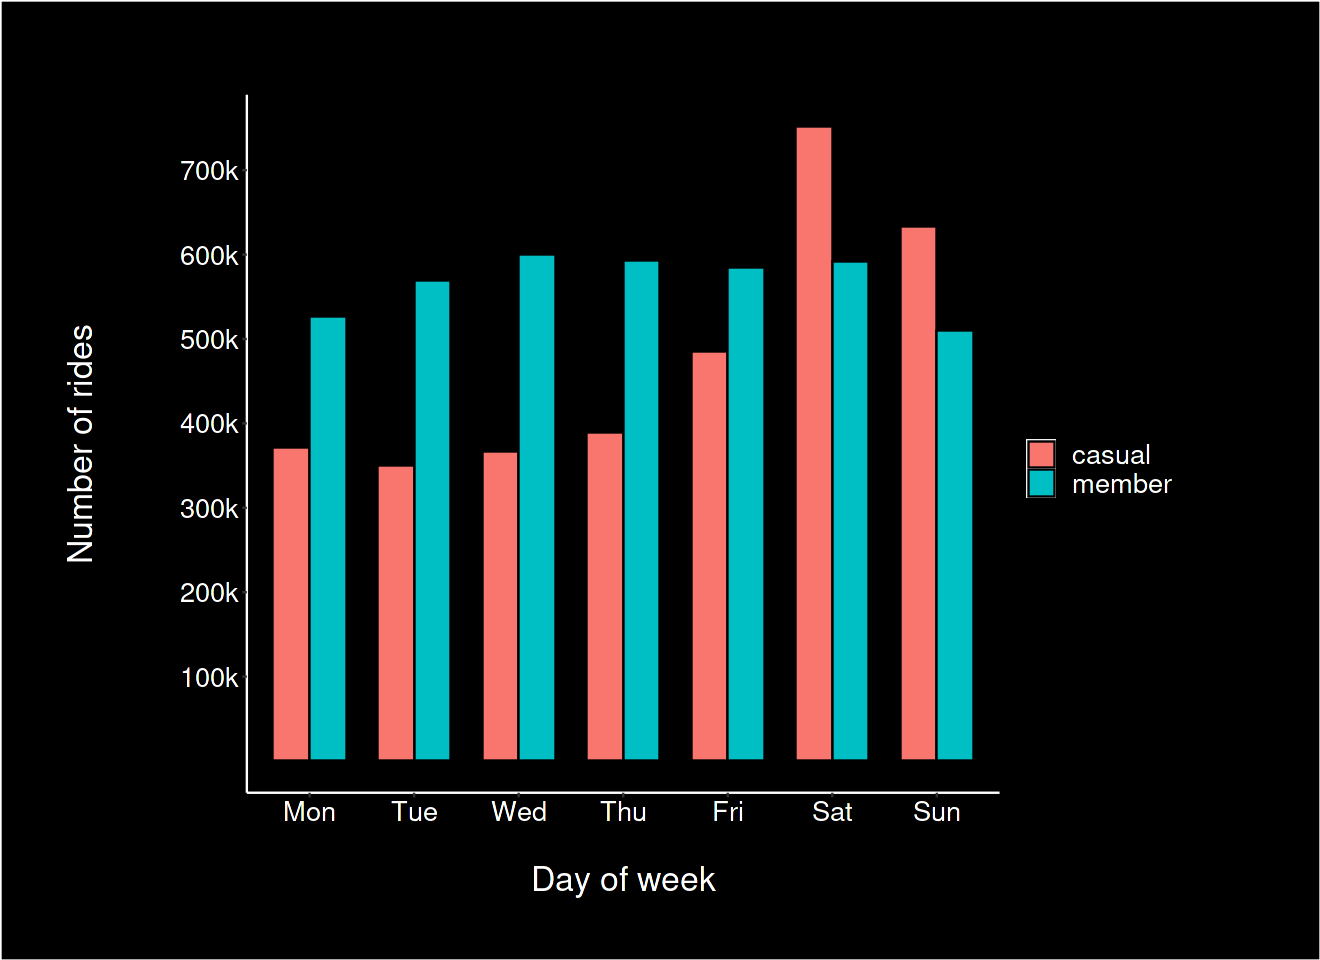

In [8]:
#analyzing ridership data by numberof_rides and weekday

summary_type_weekday <- alltrips_cleaned %>%  
mutate(weekday = wday(started_at,label = TRUE, week_start = getOption("lubridate.week.start" , 1) ))%>%
group_by(member_casual,weekday) %>% 
summarise(number_of_rides = n(),average_duration = round(mean(ride_length) , 2)) %>% arrange(member_casual , weekday)

#lets view the dataframe
View(summary_type_weekday)

#plotting a column chart for Number_of_rides Vs member_casual
p <- summary_type_weekday %>% ggplot( mapping =  aes(x = weekday, y = number_of_rides, fill = member_casual )) + 
  geom_col(position = "dodge" , width = .7 , color = "black") +
theme(panel.background = element_rect(fill = "black") ,panel.grid = element_blank() , 
      plot.background = element_rect(fill = "black"),
      legend.background=element_rect(fill="black") , 
      axis.title.x = element_text(colour = "white" , vjust = -3) ,
      axis.title.y = element_text(colour = "white", vjust = 10),
      axis.line = element_line(colour = "white"), 
      axis.text = element_text(colour = "white"), 
      legend.text = element_text(colour = "white")) + 
theme(plot.margin=unit(c(1,1,2,3),"cm") , text = element_text(size = 20)) +
  labs(x="Day of week" , y = "Number of rides") +
  scale_y_continuous(breaks =  c(100000,200000,300000,400000,500000,600000,700000) , 
                     labels = c("100k","200k","300k","400k","500k","600k","700k"))

options(repr.plot.width = 11, repr.plot.height = 8)
p + ggtitle(sprintf(
    "Plot width = %s, plot height = %s", 
    getOption("repr.plot.width"),
    getOption("repr.plot.height")
))

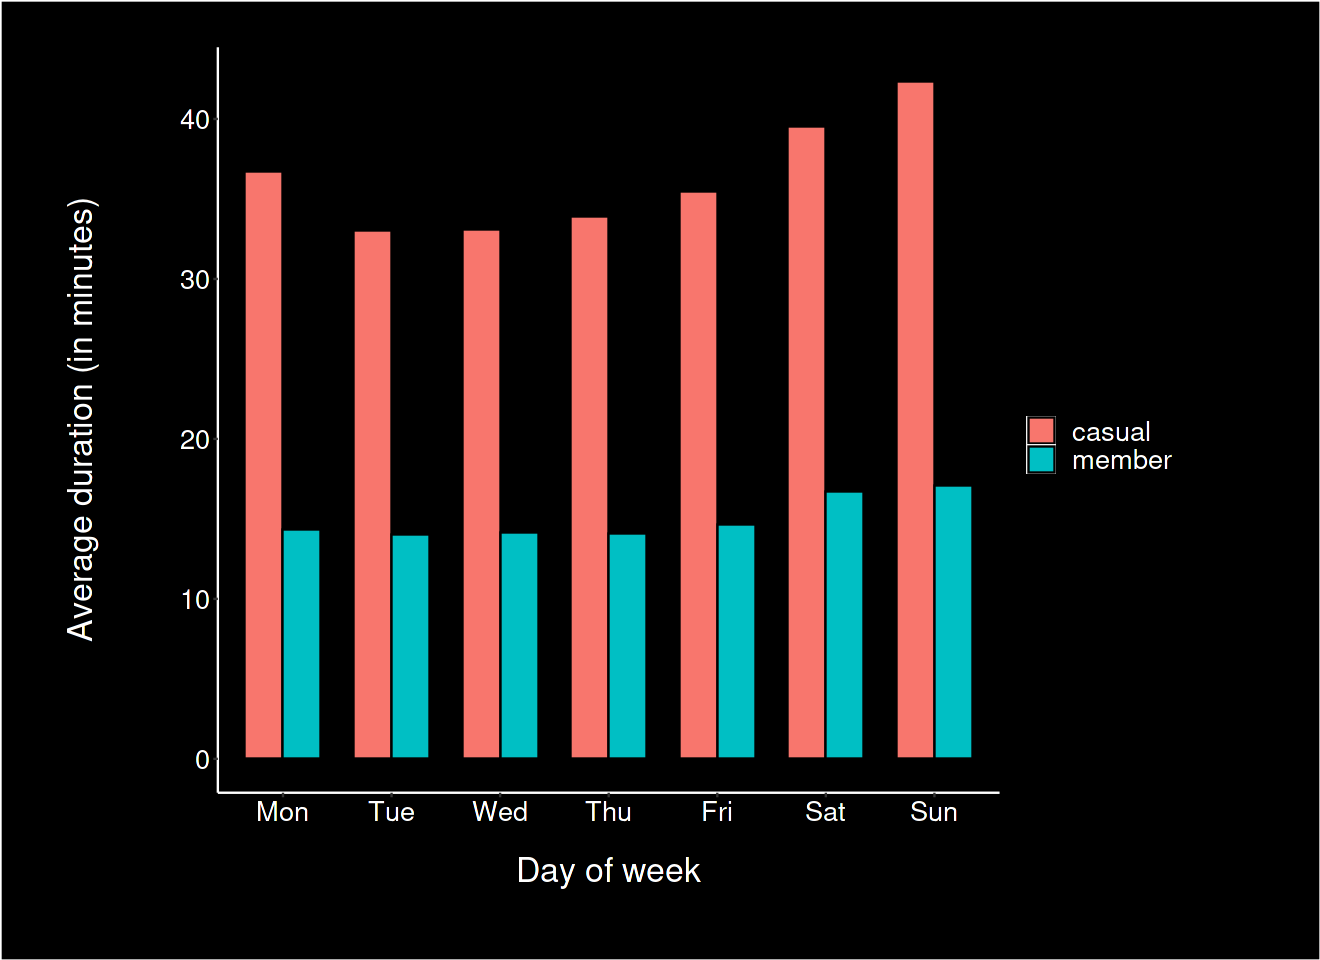

In [9]:
#plotting a column chart for average_duration Vs weekday for both member and casual type users:

summary_type_weekday %>%  ggplot( mapping =  aes(x = weekday, y = average_duration/60 , fill = member_casual )) +
  geom_col(position = "dodge" , width =  .7 , color = "black") + theme(panel.background = element_rect(fill = "black") ,
                                     panel.grid = element_blank() , plot.background = element_rect(fill = "black"),
                                     legend.background=element_rect(fill="black") , 
                                     axis.title.x = element_text(colour = "white" , vjust = -2) ,
                                     axis.title.y = element_text(colour = "white", vjust = 10),
                                     axis.line = element_line(colour = "white"),
                                     axis.text = element_text(colour = "white"),
                                     legend.text = element_text(colour = "white")) + 
theme(plot.margin=unit(c(1,1,2,3),"cm"), text = element_text(size = 20)) +
  labs(x="Day of week" , y = "Average duration (in minutes)") + scale_y_continuous()

Don't know how to automatically pick scale for object of type difftime. Defaulting to continuous.



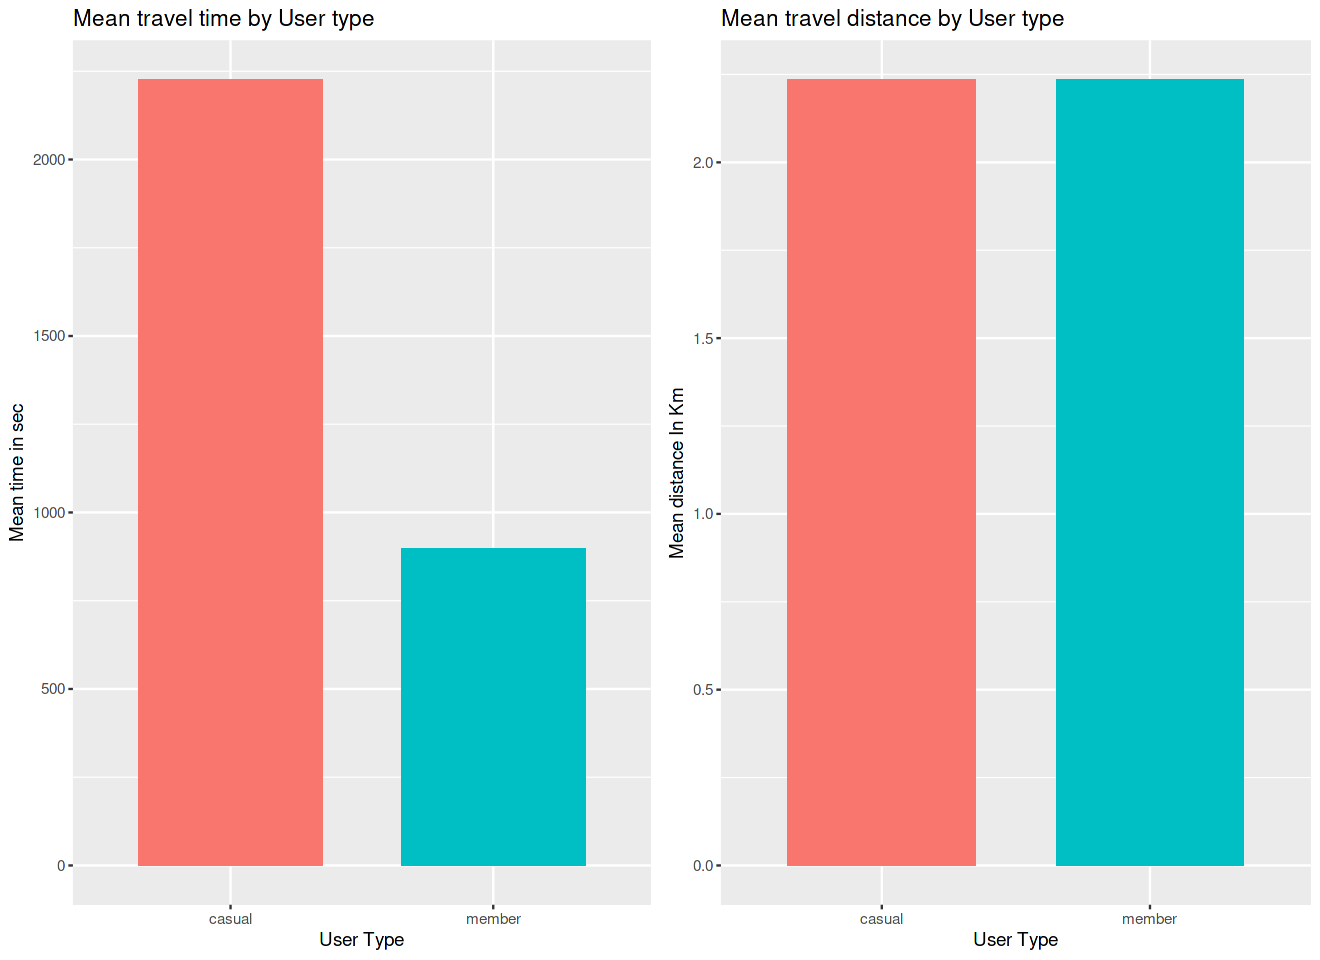

In [10]:
# calculating the average distance and average time for both the casual and member type users:

userType_means <- alltrips_cleaned %>% group_by(member_casual) %>% summarise(mean_time = mean(ride_length),
                                                                             mean_distance = mean(ride_distance))

membervstime <- ggplot(userType_means) + 
                geom_col(mapping=aes(x=member_casual,y=mean_time,fill=member_casual),position = "dodge",
                         show.legend = FALSE , width = .7) +
                labs(title = "Mean travel time by User type",x="User Type",y="Mean time in sec")

membervsdistance <- ggplot(userType_means) + 
                    geom_col(mapping=aes(x=member_casual,y=mean_distance,fill=member_casual), show.legend = FALSE , 
                             width = .7) +
                    labs(title = "Mean travel distance by User type",x="User Type",y="Mean distance In Km")

grid.arrange(membervstime, membervsdistance, ncol = 2)  

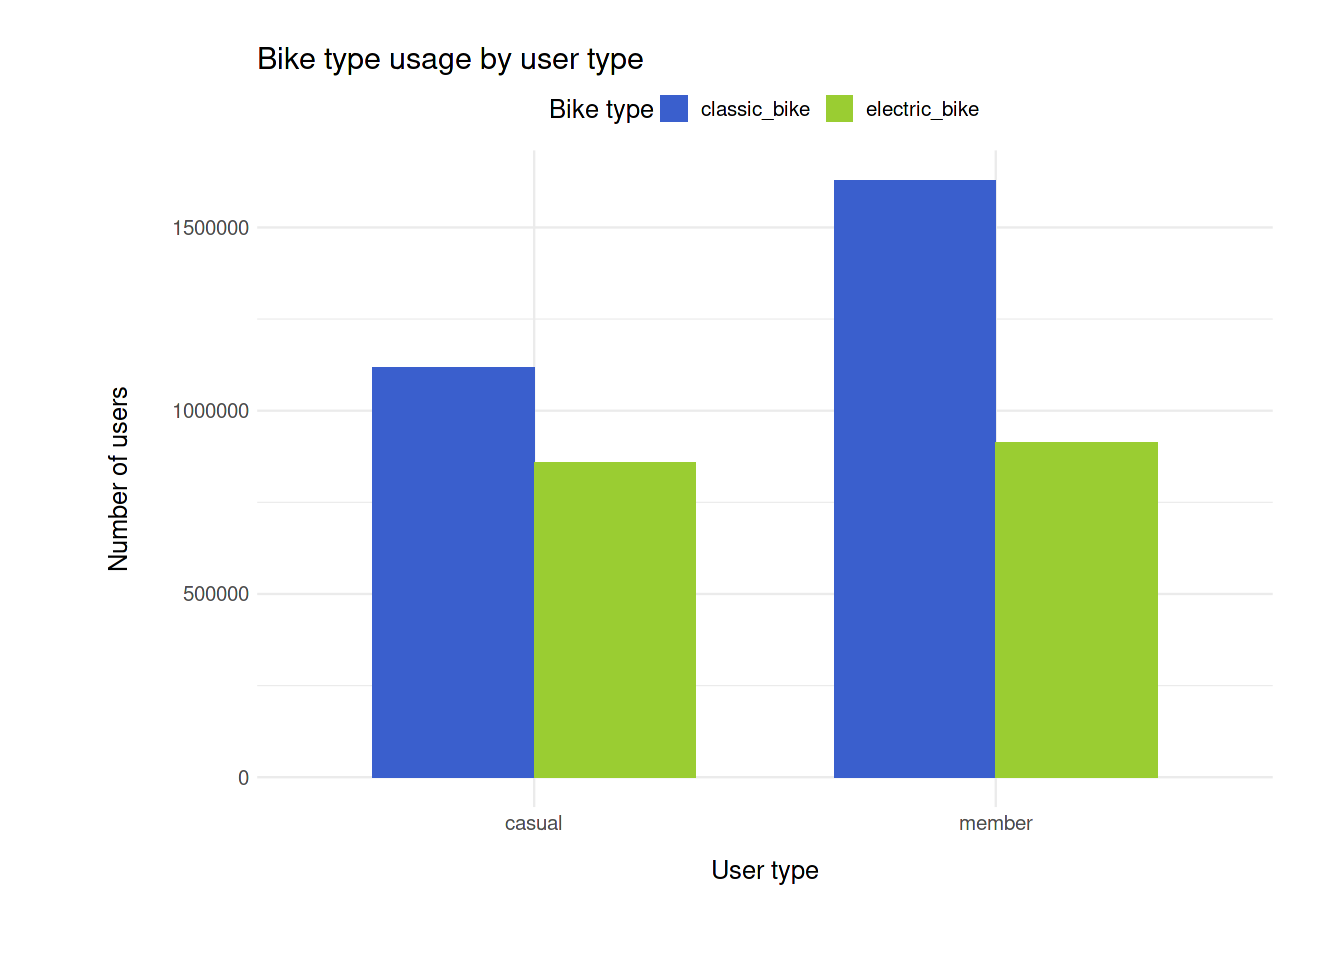

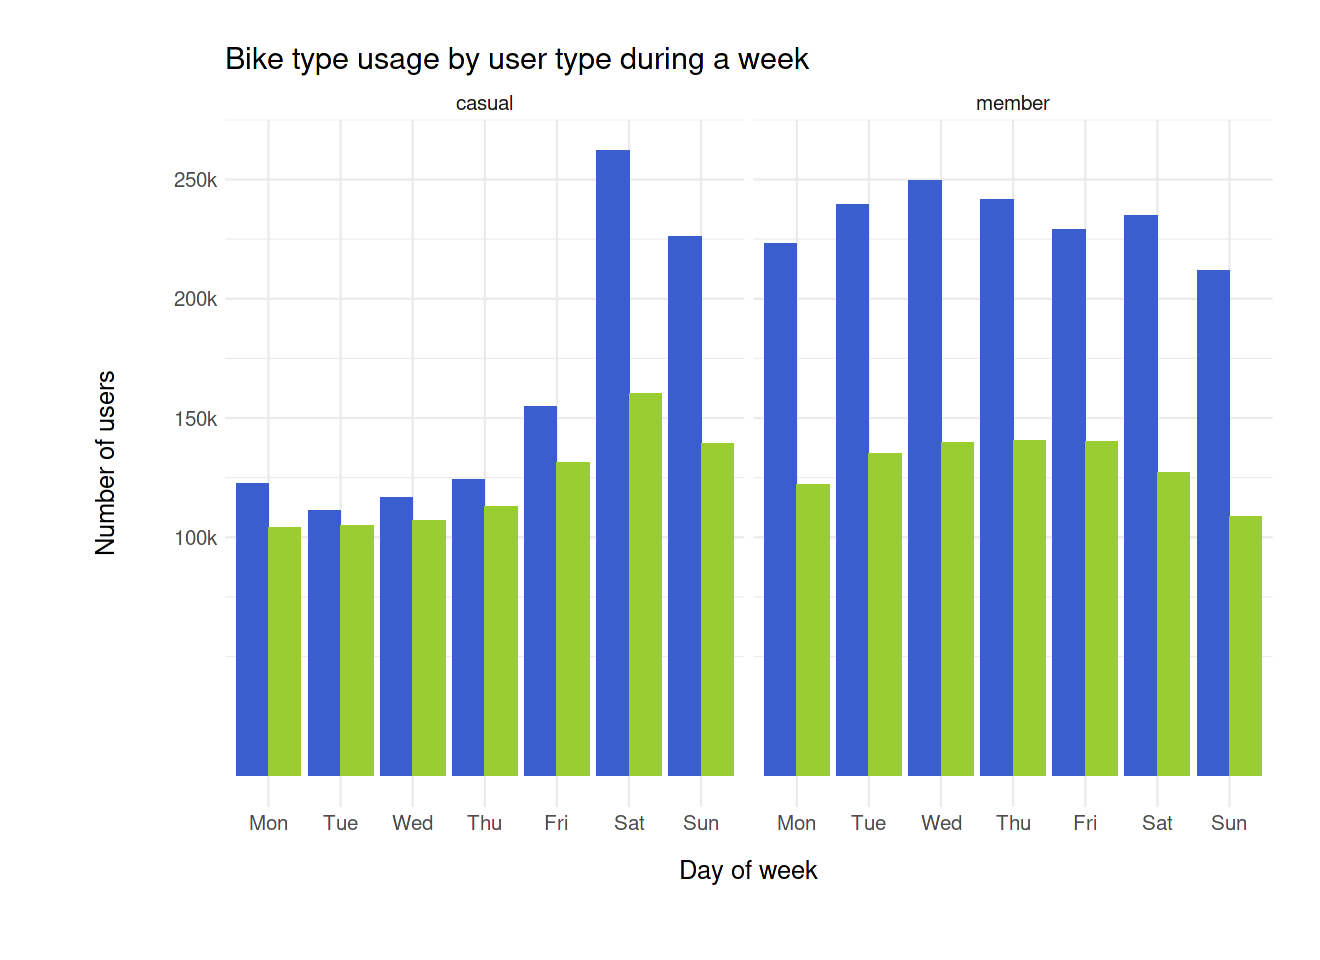

In [11]:
#Create a new data frame with only the rows with info in the "bike type" column:

with_bike_type <- alltrips_cleaned %>% filter(rideable_type=="classic_bike" | rideable_type=="electric_bike")

#Then lets check the bike type usage by user type:

with_bike_type %>%
    group_by(member_casual,rideable_type) %>%
    summarise(totals=n(), .groups="drop")  %>%

ggplot()+
    geom_col(aes(x=member_casual,y=totals,fill=rideable_type), position = "dodge", width = .7) + 
    labs(title = "Bike type usage by user type",x="User type",y= "Number of users", fill="Bike type") +
    scale_fill_manual(values = c("classic_bike" = "royalblue3","electric_bike" = "olivedrab3")) +
    theme_minimal() +
    theme(legend.position="top" , axis.title.x = element_text(colour = "black" , vjust = -2), 
          axis.title.y = element_text(colour = "black" , vjust = 6)) + 
theme(plot.margin=unit(c(1,1,2,3),"cm"), text = element_text(size = 15))

#And their usage by both user types during a week:

with_bike_type %>%
    mutate(weekday = wday(started_at, label = TRUE , week_start = getOption("lubridate.week.start" , 1))) %>% 
    group_by(member_casual,rideable_type,weekday) %>%
    summarise(totals=n(), .groups="drop") %>%

ggplot(aes(x=weekday,y=totals, fill=rideable_type)) +
  geom_col(, position = "dodge") + 
  facet_wrap(~member_casual) +
  labs(title = "Bike type usage by user type during a week",x="Day of week",y= "Number of users") +
  scale_fill_manual(values = c("classic_bike" = "royalblue3","electric_bike" = "olivedrab3")) +
  theme_minimal() +
  theme(legend.position="none" ,axis.title.x = element_text(colour = "black" , vjust = -2), 
        axis.title.y = element_text(colour = "black" , vjust = 8)) + 
  theme(plot.margin=unit(c(1,1,2,3),"cm"), text = element_text(size = 15)) + 
  scale_y_continuous(breaks =  c(100000,150000,200000,250000,300000,350000) , labels = c("100k","150k","200k","250k","300k","350k"))


### Analysis:

* The average number of rides for casual users significantly varies during the weekends as compared to normal weekdays , as shown in the first plot (number of rides vs day of week), while the members number of rides per weekday show consistency the whole week. This suggests that **the casual riders prefer weekends for rides than regular days.**

* The second plot i.e the average_duration vs day of week plot shows the huge difference between the average duration for member and casual riders as **the casuals riders prefer longer rides than there counterparts.**

* It seems that the casual users travel the same average distance as comapared to the member users, but they have much longer rides , that would indicate a more **leisure oriented usage by casual riders** vs a more **"public transport" or pragmatic use of the bikes by the annual members.**

* This idea is reinforced by the fact that **annual users have a very stable use of the service during the week**, but **the casual users are more of a weekend user.** 

## PHASE 5 : SHARE (Sharing data analysis conclusions using compelling visuals)
### Key objectives:

**1.Sharing my conclusions:**
​
* Taking in consideration both the business task: **What could motivate the “casual” users to change to an annual subscription based on their behavior?** and the insights we've learned from the available data we can make some conclusions.
    
    1)**The Casual users** have **leisure**, and **tourism** rides mostly on **weekends** and using **classic bikes**.
    
    2)**The Annual users** have **commute** or **pragmatic** rides, during **all week** using both **electric & classic bikes**
    
* I would share this info, the data and my analysis to the marketing team, and I would suggest that in order to **convert the casual to the annual** users it would be interesting to focus the messages on the **leisure** aspect of the service, and maybe offer some kind of **promotion related to weekends and/or classic bikes**.

#### Special thanks to [Mr. Julen Aranguren](https://www.kaggle.com/julenaranguren).
* Refer to [Cyclistic Bike-share - A Case study by Julen Aranguren](https://www.kaggle.com/julenaranguren/cyclistic-bike-share-a-case-study)

#### Thanks for reading. Please do comment and let me know if you liked it or if it needs any correction.